## Stratigy-1: field seismic data curation

### 1. Get raw seismic data from .segy data

In [2]:
from segysak.segy import segy_loader
import numpy as np
import matplotlib.pyplot as plt
import segyio as si
import pandas as pd
from scipy import interpolate

def mean_std_norm(data):
    data = (data-np.mean(data))/np.std(data)
    return data

/usr/local/lib/python3.9/site-packages/segysak/segy/_segy_core.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [5]:
raw_path = "./field_datasets/SUNZ-91-PR2486-T-STK_Final_Stack_2D_SUNZ91-132.sgy"
raw_data = segy_loader(raw_path,cdp=21)
raw_data["data"].shape


  0%|          | 0.00/2.72k [00:00<?, ? traces/s]

Loading as 2D


Converting SEGY:   0%|          | 0.00/2.72k [00:00<?, ? traces/s]

(2720, 1251)

before MSN -->max,min :  6.300358 -4.490239
after MSN --> max,min :  25.007818 -17.817627


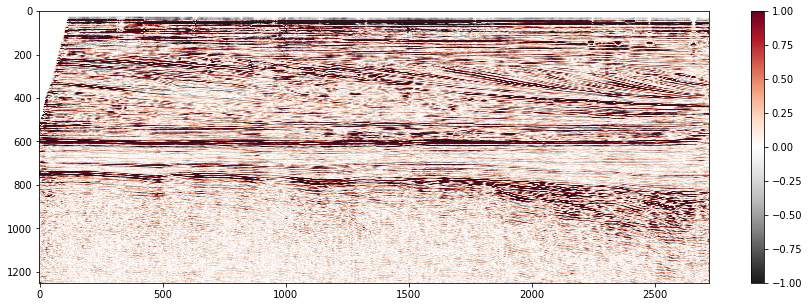

In [6]:
fx = np.array(raw_data["data"])
seis = raw_data["data"]
print("before MSN -->max,min : ",np.nanmax(seis),np.nanmin(seis))
seis = mean_std_norm(seis)
print("after MSN --> max,min : ",np.nanmax(seis),np.nanmin(seis))
plt.figure(figsize=(15,5))
# plt.imshow(seis.T,cmap="RdGy_r",aspect="auto")
# plt.imshow(seis.T,vmin=np.nanmin(seis)/10,vmax=np.nanmax(seis)/10,cmap="RdGy_r",aspect="auto")
plt.imshow(seis.T,vmin=-1,vmax=1,cmap="RdGy_r",aspect="auto")
plt.colorbar()
plt.show()

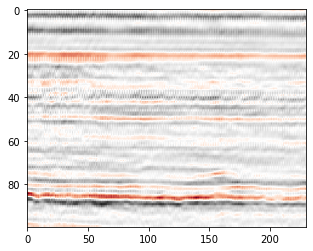

In [17]:
window_range = [1500, 1730, 50, 150]
data = fx[window_range[0]:window_range[1],window_range[2]:window_range[3]]
# data = np.flip(data,0)
data_shape = data.shape
data = mean_std_norm(data)
plt.figure(figsize=(5,4))
plt.imshow(data.T,cmap="RdGy_r",aspect="auto")
plt.show()

In [16]:
si = 0
readme_path = "./benchmark_dataset/parallel_0/"
dim = data_shape
save_path = readme_path+str(si)+".dat"
data.tofile(save_path)

### 2. data post-processes

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from utils_dataprocess import *

def data_process(x):
    x = mean_std_norm(x)
    scale = x.shape[1]/128
    x = bandpass_filter(x, 5, 30,dt=0.002/scale)
    x = dataupsample_2d(x=x,axis=0,num_up=128,method = 'cubic')
    x = dataupsample_2d(x=x,axis=1,num_up=128,method = 'cubic')
    x = amplitude_equalization(x)
    x = sos(x,nither=5)
    x = spectrum_equalization(x, 5, 30, 0.002)
    x = sos(x,nither=5)
    x = amplitude_equalization(x)
    x = mean_std_norm(x)
    return x

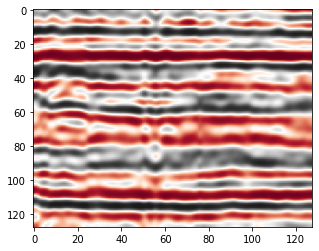

In [28]:
data2 = data_process(data)
plt.figure(figsize=(5,4))
plt.imshow(data2.T,cmap="RdGy_r",aspect="auto")
plt.show()

### 3. skeletonization

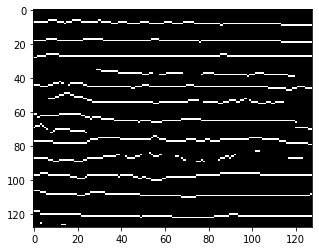

In [30]:
peak = find_2D_peaks(data2, find_through=False)
plt.figure(figsize=(5,4))
plt.imshow(peak.T,cmap="gray",aspect="auto",interpolation="nearest")
plt.show()